# Lab 4 - Revisão do Módulo 1

Vamos revisar os principais conceitos do módulo 1. 

In [64]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
# Importando libs de plots
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
# sns.set_context('talk')
sns.set_palette('rainbow')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

## Leitura dos Dados

In [65]:
df = pd.read_csv('train.csv')

In [66]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Pré-processamento

In [67]:
(df.isna()
   .mean()
   .sort_values(ascending=False)
   .reset_index()
   .head(15)
   .rename(columns = {'index' : 'Column', 0 : 'Missing %'})
   .style.format("{:.2%}", subset = ['Missing %'])
)

,Column,Missing %
0,PoolQC,99.52%
1,MiscFeature,96.30%
2,Alley,93.77%
3,Fence,80.75%
4,FireplaceQu,47.26%
5,LotFrontage,17.74%
6,GarageYrBlt,5.55%
7,GarageCond,5.55%
8,GarageType,5.55%
9,GarageFinish,5.55%


In [209]:
df[df['GarageYrBlt'].isna()][['YearBuilt', 'GarageYrBlt']]

,YearBuilt,GarageYrBlt
39,1955,NaN
48,1920,NaN
78,1968,NaN
88,1915,NaN
89,1994,NaN
...,...,...
1349,1872,NaN
1407,1985,NaN
1449,1970,NaN
1450,1974,NaN


In [208]:
(df['YearBuilt'] == df['GarageYrBlt']).mean()

0.7458904109589041

In [210]:
df['GarageYrBlt'].fillna(df['YearBuilt'], inplace = True)

### Transformando variáveis ordinais 

In [69]:
ordinal_features_1 = ["ExterQual",
                    "ExterCond",
                    "BsmtQual",
                    "BsmtCond",
                    "HeatingQC",
                    "KitchenQual",
                    "FireplaceQu",
                    "GarageQual",
                    "GarageCond",
                    "PoolQC",]
                    
type_1_map = {"Po" : 0,
               "Fa" : 1,
               "TA" : 2, 
               "Gd" : 3, 
               "Ex" : 4}


other_feature_maps = {"LotShape": {"Reg" : 0, "IR1"  : 1, "IR2" : 2, "IR3" : 3},
                      "LandSlope": {"Sev" : 0, "Mod" : 1, "Gtl" : 2},
                      "BsmtExposure": {"No" : 0, "Mn" : 1, "Av" : 2, "Gd" : 3},
                      "BsmtFinType1": {"Unf" : 0, "LwQ" : 1, "Rec" : 2, "BLQ" : 3, "ALQ" : 4, "GLQ" : 5},
                      "BsmtFinType2": {"Unf" : 0, "LwQ" : 1, "Rec" : 2, "BLQ" : 3, "ALQ" : 4, "GLQ" : 5},
                      "Functional": {"Sal" : 0, "Sev" : 1, "Maj1" : 2, "Maj2" : 3, "Mod" : 4, "Min2" : 5, "Min1" : 6, "Typ" : 6},
                      "GarageFinish": {"Unf" : 0, "RFn" : 1, "Fin" : 2},
                      "PavedDrive": {"N" : 0, "P" : 1, "Y" : 2},
                      "Utilities": {"NoSeWa" : 0, "NoSewr" : 1, "AllPub" : 3},
                      "CentralAir": {"N" : 0, "Y" : 1},
                      "Electrical": {"Mix" : 0, "FuseP" : 1, "FuseF" : 2, "FuseA" : 3, "SBrkr" : 4},
                      "Fence": {"MnWw" : 0, "GdWo" : 1, "MnPrv" : 2, "GdPrv" : 3},}

In [70]:
for col in ordinal_features_1:
  df[col] = df[col].map(type_1_map)

for col, feature_map in other_feature_maps.items():
  df[col] = df[col].map(feature_map)

## EDA

### Analisando Target

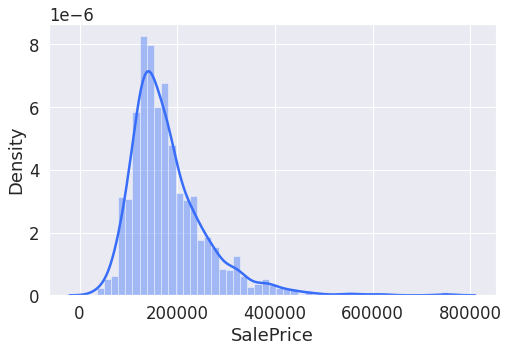

In [72]:
fig, ax = plt.subplots(figsize = (8,5))
sns.distplot(df['SalePrice']);

### Priorizando Features

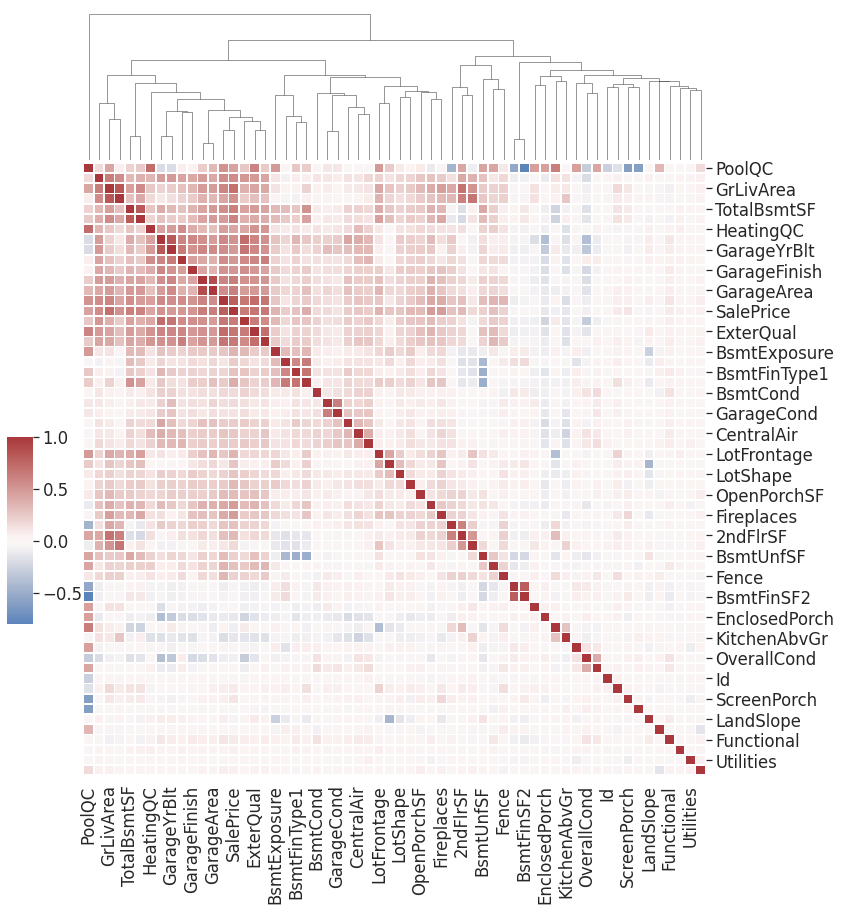

In [81]:
g = sns.clustermap(df.corr().fillna(0), center=0, cmap="vlag",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))
g.ax_row_dendrogram.remove()

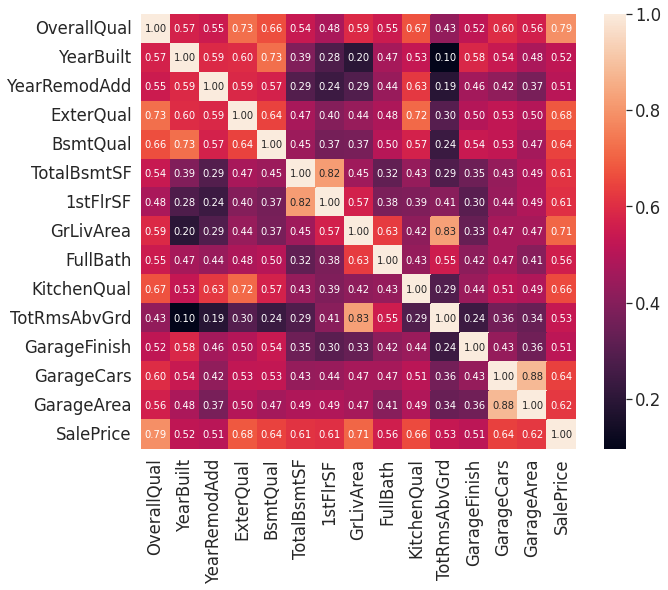

In [102]:
k = 10 
cols = df.corr()['SalePrice'][df.corr()['SalePrice'].abs() > 0.5].index.values
cm = df[cols].corr()

fig, ax = plt.subplots(figsize = (10,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols, xticklabels=cols)
plt.show()

In [120]:
features_of_interest = cols

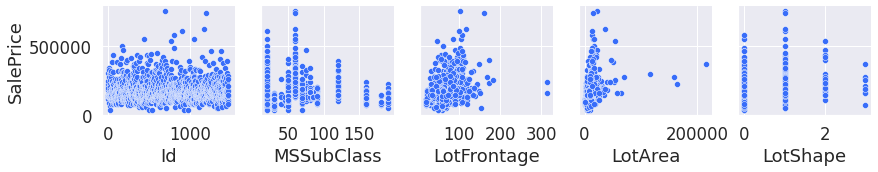

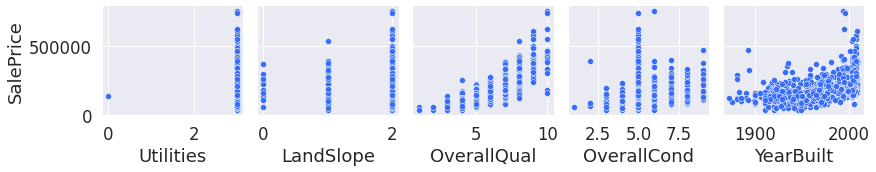

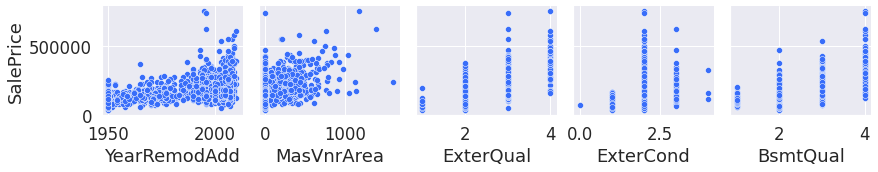

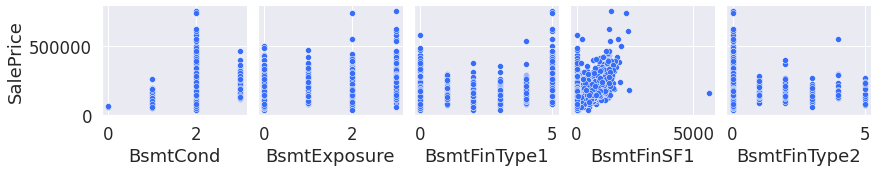

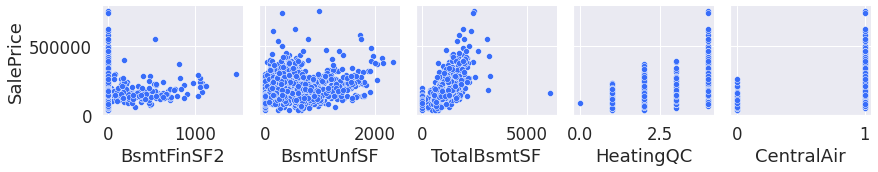

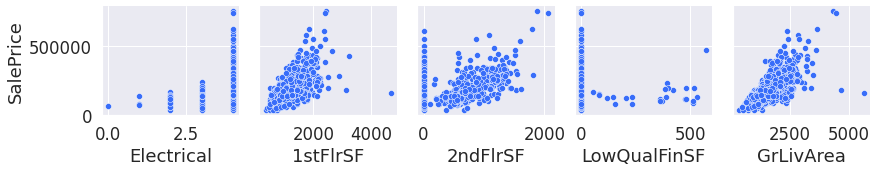

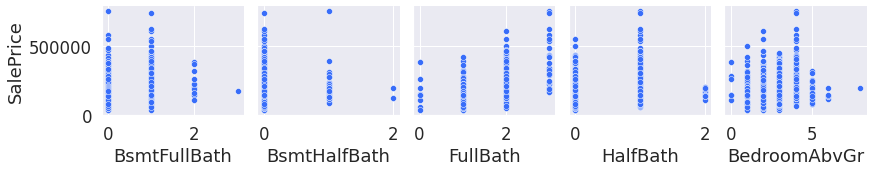

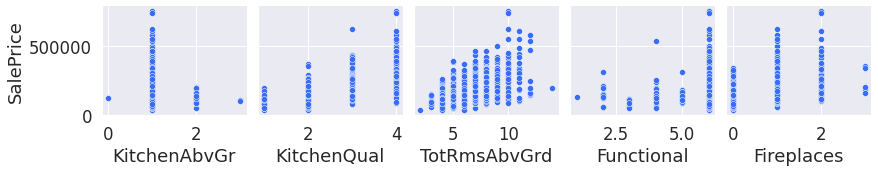

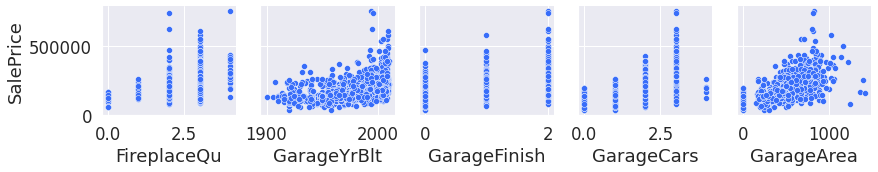

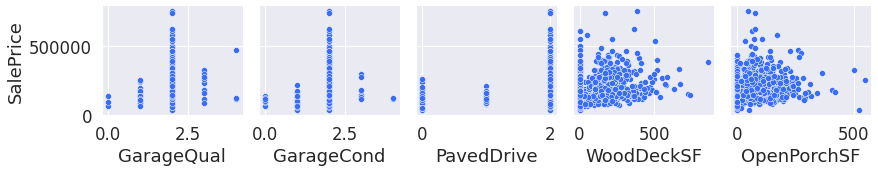

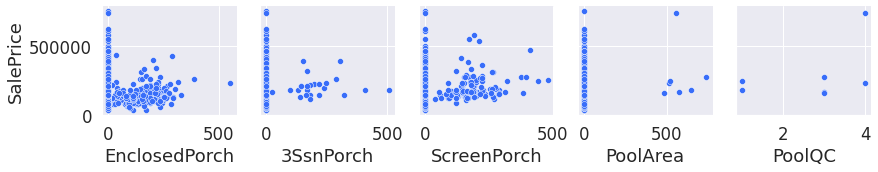

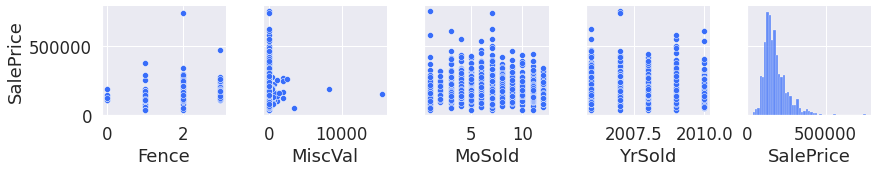

In [104]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

### Algumas Análises Quant x Quant

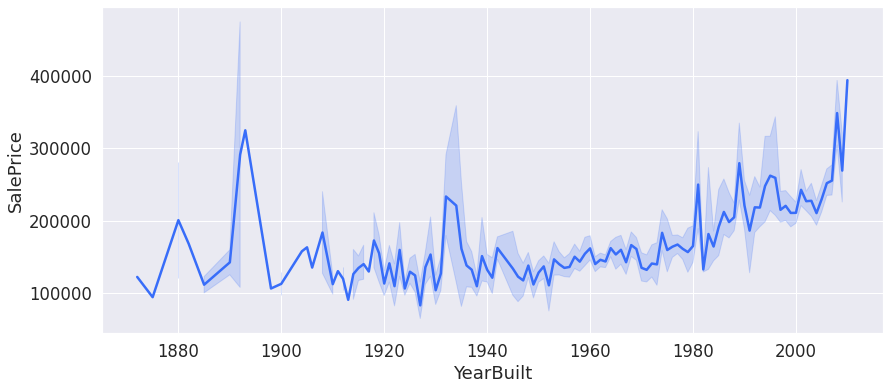

In [73]:
f, ax = plt.subplots(figsize=(14, 6))
sns.lineplot(x='YearBuilt', y="SalePrice", data=df);

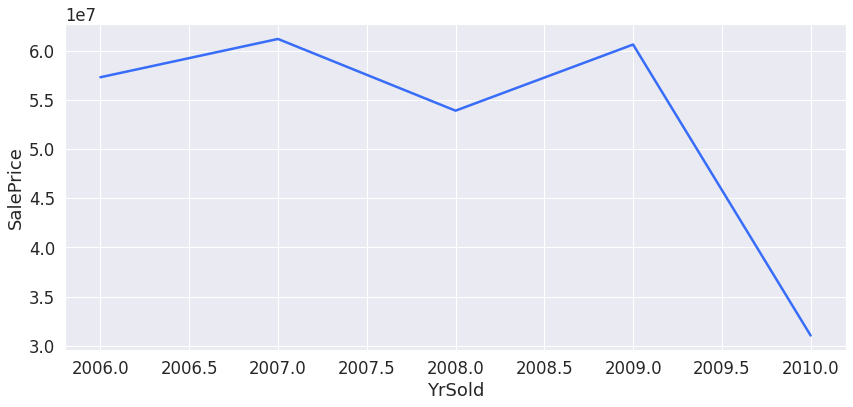

In [74]:
f, ax = plt.subplots(figsize=(14, 6))
sns.lineplot(x='YrSold', y="SalePrice", data=df.groupby('YrSold')['SalePrice'].sum().reset_index());

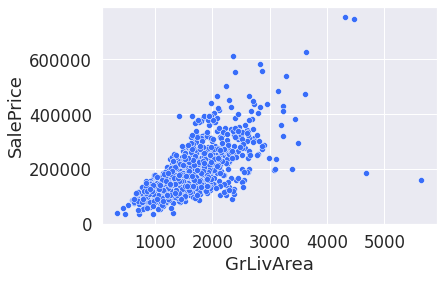

In [75]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data = df);

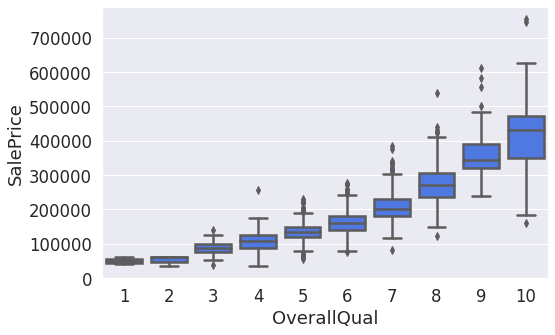

In [76]:
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x='OverallQual', y='SalePrice', data = df, color = '#386df9');

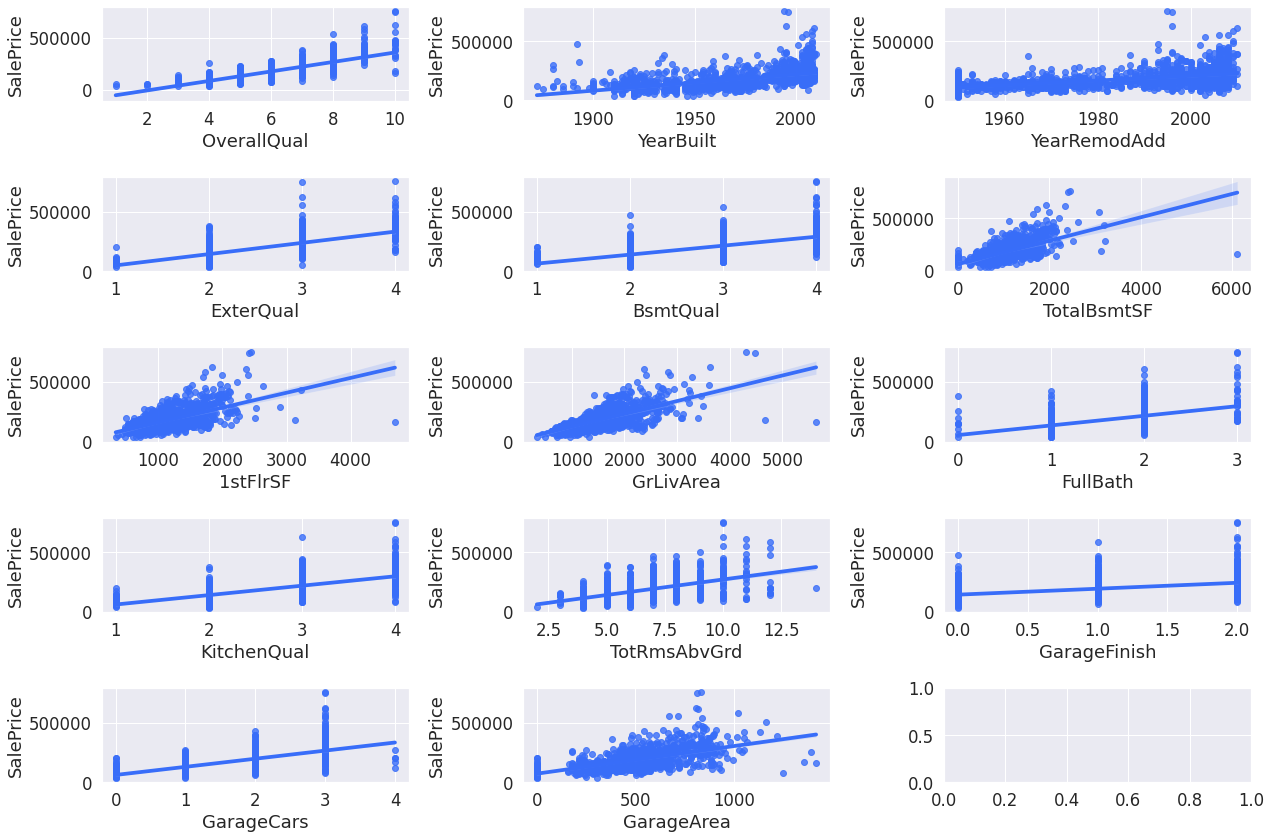

In [124]:
fig, ax = plt.subplots(round(len(features_of_interest) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_of_interest) - 1:
        sns.regplot(x=features_of_interest[i],y='SalePrice', data=df[features_of_interest], ax=ax)

plt.tight_layout()

### Quantitative x Qualitative

- Como podemos rankear features qualitativas em relação ao target?
  - Dois níveis: point bisserial ($H_0$ variáveis são correlacionadas)
  - Múltiplos níveis: 
    - Paramétrico: ANOVA ($H_0$ variáveis não são correlacionadas)
    - Não-paramétrico: Kruskal-Wallis test 

In [127]:
df['Utilities'].unique()

array([3, 0])

In [128]:
stats.pointbiserialr(df['Utilities'], df['SalePrice'])

PointbiserialrResult(correlation=0.014314296147248773, pvalue=0.5847167739692756)

In [139]:
df['teste'] = np.random.choice([1,5,10,2], len(df))

In [144]:
CategoryGroupLists = df.groupby('teste')['SalePrice'].apply(list)
stats.f_oneway(*CategoryGroupLists)

F_onewayResult(statistic=0.7261673930264905, pvalue=0.5363697205858118)

In [145]:
CategoryGroupLists = df.groupby('MSZoning')['SalePrice'].apply(list)
stats.f_oneway(*CategoryGroupLists)

F_onewayResult(statistic=43.84028167245718, pvalue=8.817633866272648e-35)

In [159]:
cat_corrs = []
for col in [x for x in df.columns if x not in df_num.columns]:
  CategoryGroupLists = df.groupby(col)['SalePrice'].apply(list)
  # r = stats.f_oneway(*CategoryGroupLists)
  r = stats.kruskal(*CategoryGroupLists)
  cat_corrs.append((col, r[0], r[1]))

In [162]:
[x for x in cat_corrs if x[2] < 0.05]

[('MSZoning', 43.84028167245718, 8.817633866272648e-35),
 ('Alley', 35.56206043131903, 4.899826166771113e-08),
 ('LandContour', 12.850188333283924, 2.7422167521379096e-08),
 ('LotConfig', 7.80995412346779, 3.163167473604189e-06),
 ('Neighborhood', 71.78486512058278, 1.5586002827707996e-225),
 ('Condition1', 6.118017137125926, 8.904549416138853e-08),
 ('Condition2', 2.0738986215227877, 0.043425658360948464),
 ('BldgType', 13.01107716962085, 2.0567364604967015e-10),
 ('HouseStyle', 19.595000995981213, 3.376776535121222e-25),
 ('RoofStyle', 17.80549722914421, 3.653523047099125e-17),
 ('RoofMatl', 6.727304893420314, 7.231444779987188e-08),
 ('Exterior1st', 18.61174286624578, 2.5860887286376316e-43),
 ('Exterior2nd', 17.500839571369834, 4.8421856706985465e-43),
 ('MasVnrType', 111.67238008941875, 4.793331178118786e-65),
 ('Foundation', 100.25385058740888, 5.791895002232233e-91),
 ('Heating', 4.259818559406287, 0.000753472106445497),
 ('GarageType', 71.5221230789301, 1.247153670658973e-66),


In [163]:
cat_cols_of_interest = [x[0] for x in cat_corrs if x[2] < 0.05]

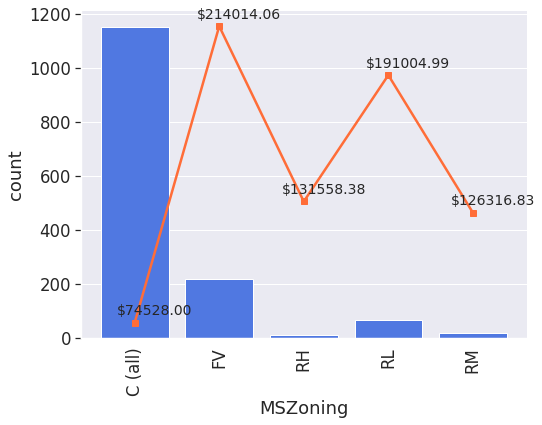

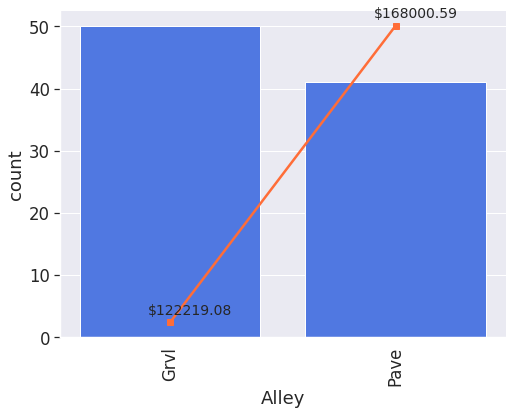

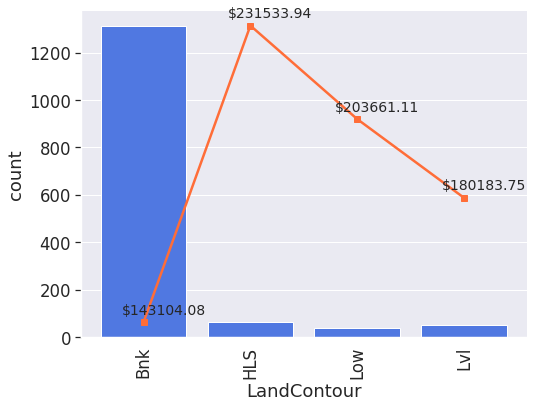

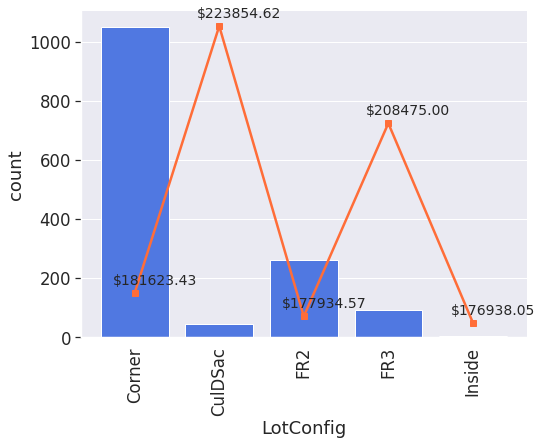

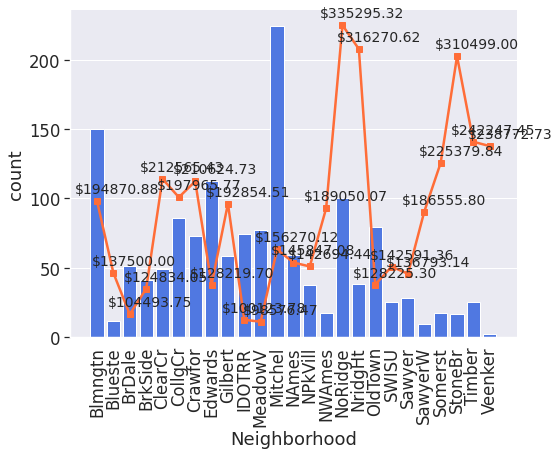

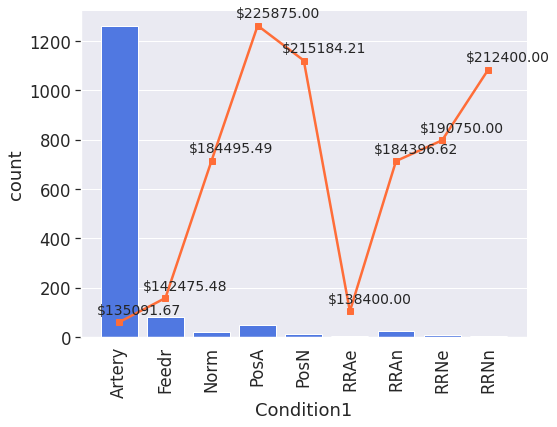

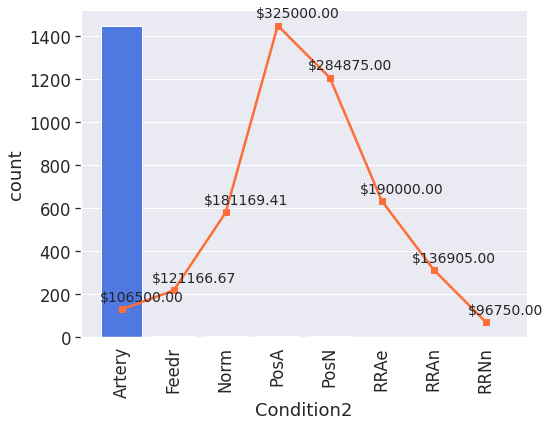

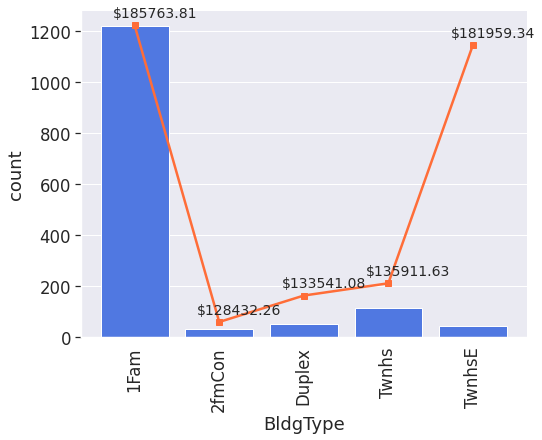

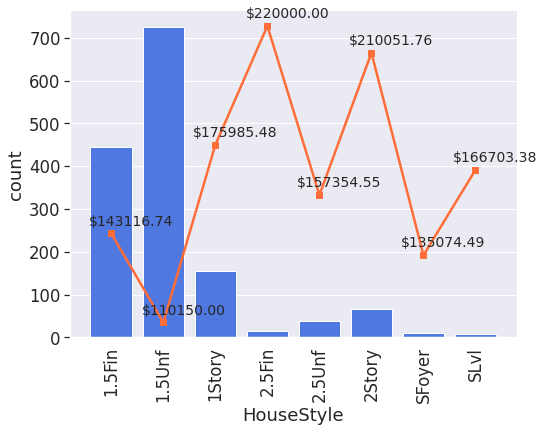

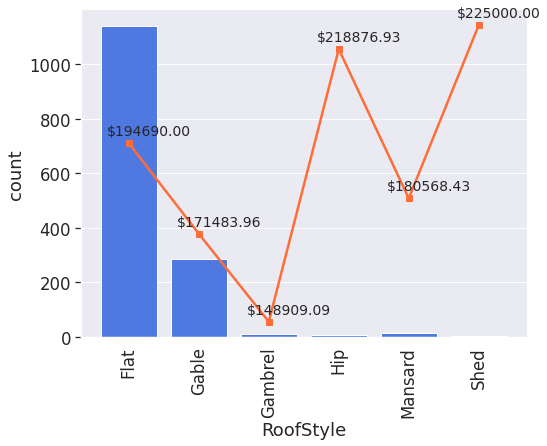

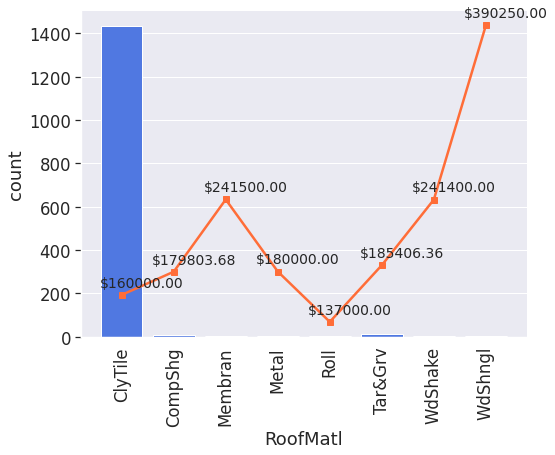

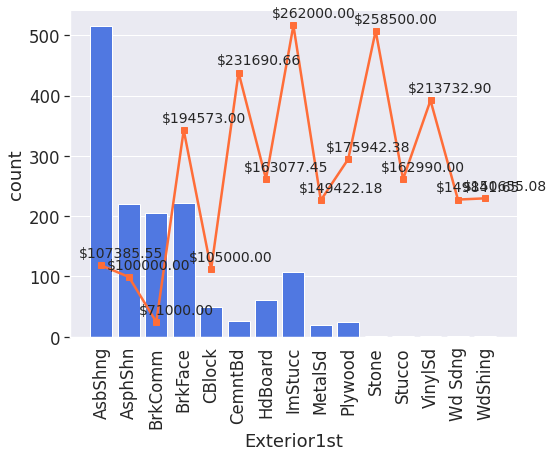

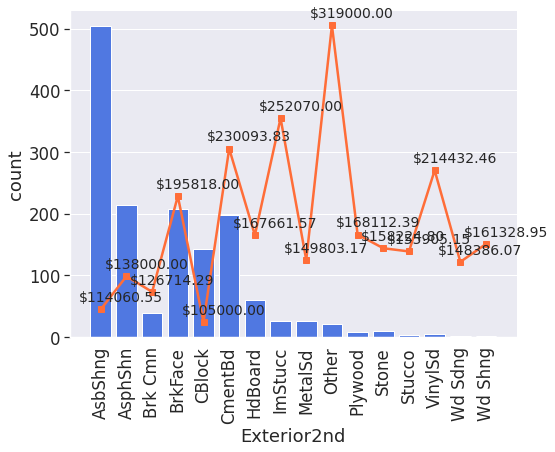

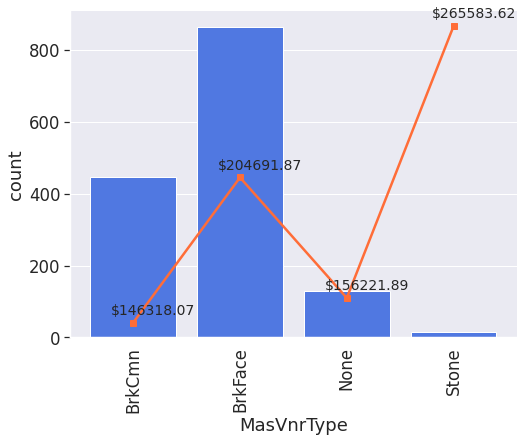

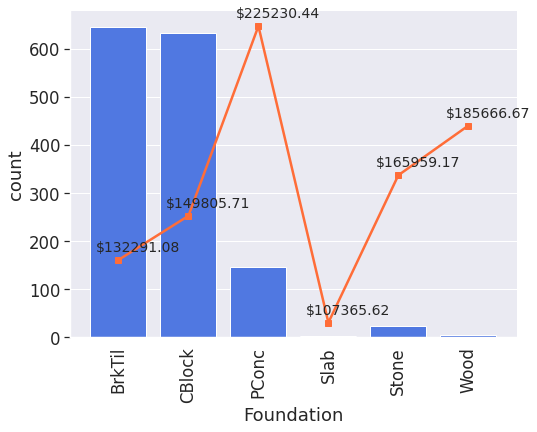

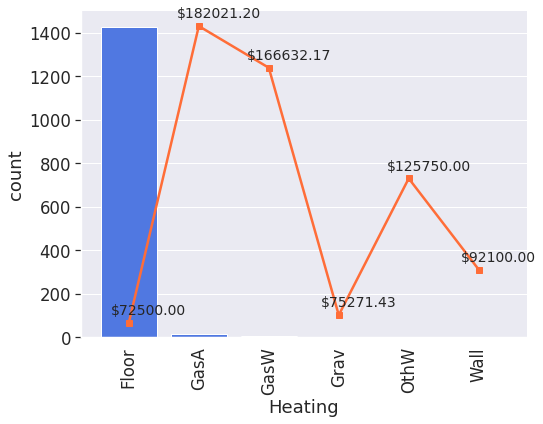

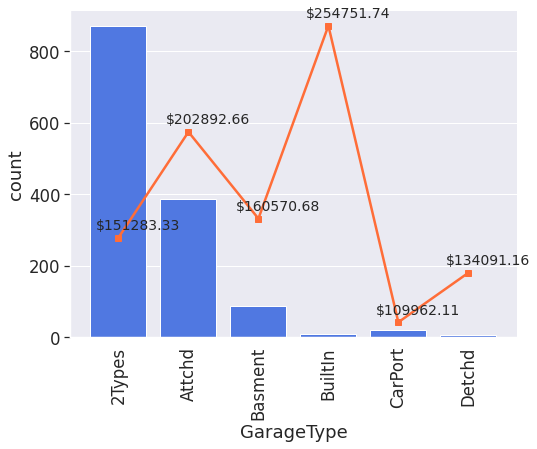

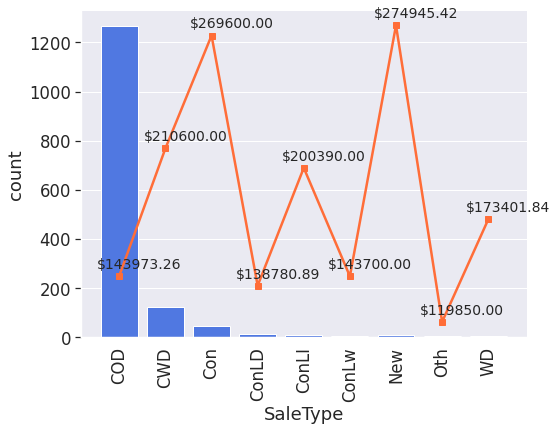

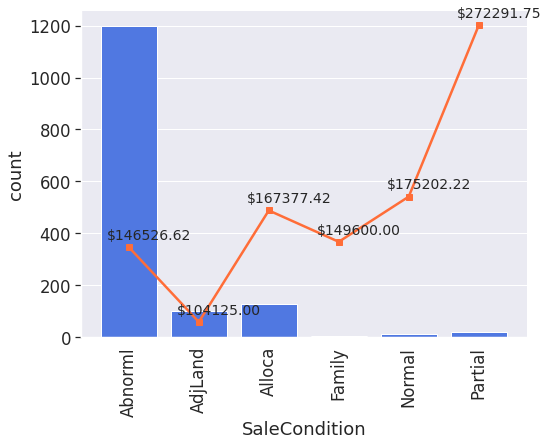

In [168]:
import matplotlib.ticker as mtick

for col in cat_cols_of_interest:
  fig, ax = plt.subplots(figsize = (8,6))
  g = df.groupby(col)['SalePrice'].mean().reset_index()
  # g['Turnover'] *= 100
  sns.countplot(col, data = df, ax = ax, color = '#386df9');
  ax.set_xticklabels(g[col], rotation=90)  
  ax2 = ax.twinx()

  ax2.plot(range(g[col].nunique()), g['SalePrice'], '-s', color ='#ff6d38')
  ax2.grid(False)
  ax2.get_yaxis().set_ticks([])

  for x,y in zip(range(g[col].nunique()), g['SalePrice'].values):
      label = "${:.2f}".format(y)
      ax2.annotate(label, 
                  (x,y), 
                  textcoords="offset points", 
                  xytext=(20,8),
                  size = 14, 
                  ha='center') 

  sns.despine()

### Qualitativo x Qualitativo 
* Chi-Squared: $H_0$: As duas amostras são independentes


### Feature Engineering

In [170]:
df['AGE'] = df['YrSold'] - df['YearRemodAdd']
df['TOTAL_NUM_BATHROOMS'] = df['FullBath'] + df['HalfBath']*0.5 + df['BsmtFullBath'] + df['BsmtHalfBath']*0.5
# df['REMODELLED'] = (df['YearRemodAdd'] > df['YearBuilt']).astype('category')
df['TOTAL_AREA'] = df['GrLivArea'] + df['TotalBsmtSF']
df["OverallGrade"] = df["OverallQual"] * df["OverallCond"]


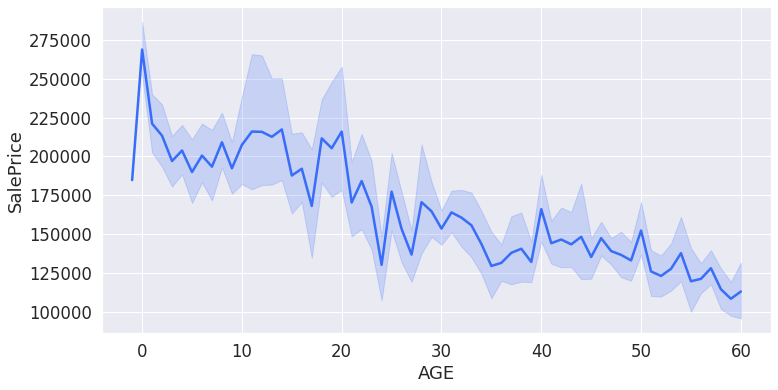

In [45]:
f, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='AGE', y="SalePrice", data=df);

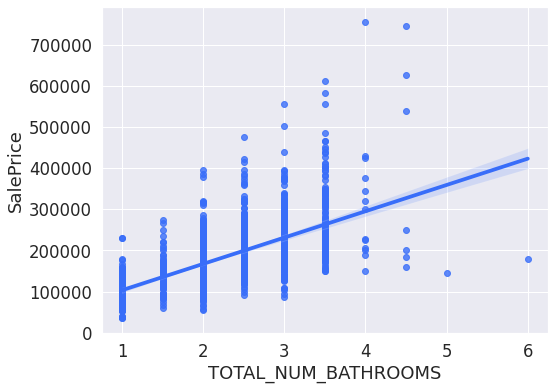

In [46]:
f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x='TOTAL_NUM_BATHROOMS', y="SalePrice", data=df);

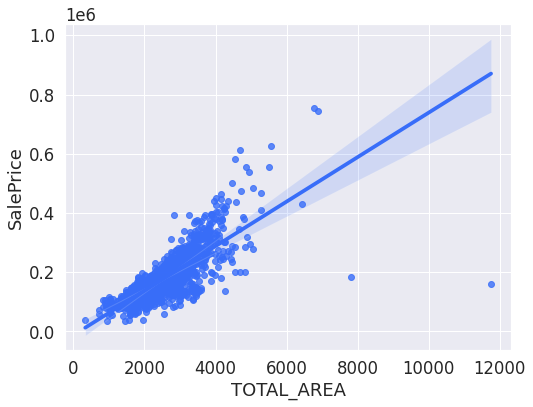

In [47]:
f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x='TOTAL_AREA', y="SalePrice", data=df);

### Existem Outliers? 

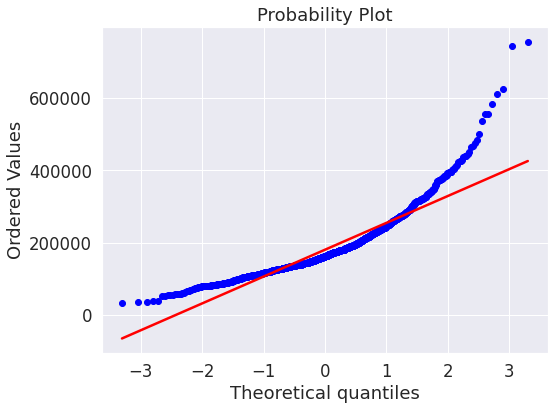

In [30]:
fig, ax = plt.subplots(figsize = (8,6))
stats.probplot(df['SalePrice'].values, dist="norm", plot = plt);

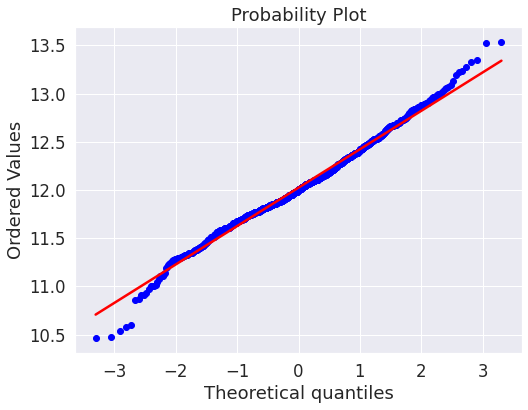

In [32]:
fig, ax = plt.subplots(figsize = (8,6))
stats.probplot(np.log(df['SalePrice'].values), dist="norm", plot = plt);

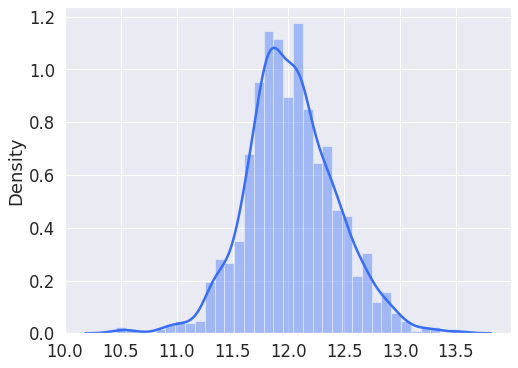

In [35]:
fig, ax = plt.subplots(figsize = (8,6))
sns.distplot(np.log(df['SalePrice'].values));

In [53]:
df['log_saleprice'] = np.log(df['SalePrice'])
df['z_log_saleprice'] = (df['log_saleprice'] - df['log_saleprice'].mean()) / df['log_saleprice'].std()

In [58]:
df.query('abs(z_log_saleprice) > 3')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AGE,TOTAL_NUM_BATHROOMS,TOTAL_AREA,log_saleprice,z-log_saleprice,z_log_saleprice
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000,58,1.0,1966,10.596635,-3.573437,-3.573437
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000,1,3.0,5496,13.226723,3.010807,3.010807
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,GasA,TA,N,FuseA,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,523,115,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900,59,1.0,1440,10.460242,-3.914887,-3.914887
533,534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Fa,N,FuseF,334,0,0,334,0,0,1,0,1,1,Fa,2,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300,57,1.0,334,10.578980,-3.617635,-3.617635
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000,12,4.0,6760,13.534473,3.781237,3.781237
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933,0,3.5,4556,13.275828,3.133736,3.133736
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657,0,3.5,4694,13.323927,3.254149,3.254149
916,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50,Unf,0,430,480,GasA,TA,N,FuseA,480,0,0,480,1,0,0,0,1,1,TA,4,Typ,0,NaN,Detchd,1958.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311,56,1.0,960,10.471950,-3.885577,-3.885577
968,969,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,3,6,1

#### Median Absolute Deviation

$$\frac{0.6745(x_i - median)}{MAD}$$, $MAD = median(x_i - median)$

In [60]:
(df['log_saleprice'] - df['log_saleprice'].median()).abs().median()

0.24171993688714544

In [62]:
df['z_robust'] = 0.6745 * (df['log_saleprice'] - df['log_saleprice'].median()) / (df['log_saleprice'] - df['log_saleprice'].median()).abs().median()

In [63]:
df.query('abs(z_robust) > 3')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AGE,TOTAL_NUM_BATHROOMS,TOTAL_AREA,log_saleprice,z-log_saleprice,z_log_saleprice,z_robust
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000,58,1.0,1966,10.596635,-3.573437,-3.573437,-3.920179
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904,Unf,0,312,2216,GasA,Ex,Y,SBrkr,2234,0,0,2234,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009.0,Fin,3,1166,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837,0,3.0,4450,13.126031,2.758730,2.758730,3.137897
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000,1,3.0,5496,13.226723,3.010807,3.010807,3.418872
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,GasA,TA,N,FuseA,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,523,115,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900,59,1.0,1440,10.460242,-3.914887,-3.914887,-4.300771
533,534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Fa,N,FuseF,334,0,0,334,0,0,1,0,1,1,Fa,2,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300,57,1.0,334,10.578980,-3.617635,-3.617635,-3.969443
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000,12,4.0,6760,13.534473,3.781237,3.781237,4.277622
705,706,190,RM,70.0,5600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,2Story,4,5,1930,1950,Hip,CompShg,VinylSd,Wd Shng,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Fa,N,SBrkr,372,720,0,1092,0,0,2,0,3,2,Fa,7,Mod,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,Othr,3500,7,2010,WD,Normal,55000,60,2.0,1092,10.915088,-2.776210,-2.776210,-3.031559
710,711,30,RL,56.0,4130,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,3,6,1935,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,270,270,GasA,Gd,Y,SBrkr,729,0,0,729,0,0,1,0,2,1,TA,5,Maj2,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,52000,5,1.0,999,10.858999,-2.916626,-2.916626,-3.188072
769,770,60,RL,47.0,53504,Pave,NaN,IR2,H

## Testes de Hipóteses

In [176]:
stats.ttest_ind(df.query('AGE < 5')['SalePrice'], df.query('AGE >= 5')['SalePrice'], equal_var = False, alternative = 'greater')

Ttest_indResult(statistic=12.886414577674653, pvalue=1.0)

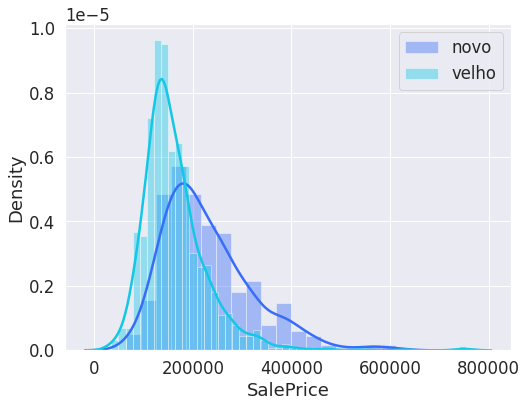

In [181]:
fig, ax = plt.subplots(figsize = (8,6))
sns.distplot(df.query('AGE < 5')['SalePrice'], ax = ax, label = 'novo');
sns.distplot(df.query('AGE >= 5')['SalePrice'], ax = ax, label = 'velho');
plt.legend();

#### Múltiplos testes

Vamos supor que façamos 20 testes estatísticos em sequência com os mesmos dados:

* $P ($at least one significant result$) = 1 – P ($no significant results$)$
* $P ($at least one significant result$) = 1 – (1-0.05)^{20}$
* $P ($at least one significant result$) = 0.64$

In [184]:
from statsmodels.sandbox.stats.multicomp import multipletests

In [192]:
df['AGE_GROUP'] = pd.qcut(df['AGE'], q = 5)

In [193]:
cat = df['AGE_GROUP'].unique()

p_values = []

for c1 in cat:
  for c2 in cat:
    if c1 == c2:
      continue
    p = stats.ttest_ind(df[df['AGE_GROUP'] == c1]['SalePrice'], df[df['AGE_GROUP'] == c2]['SalePrice'], equal_var = False, alternative = 'greater')[1]
    p_values.append(p)

In [194]:
p_values

[3.26380575202585e-26,
 0.4395566208755817,
 0.999999949864134,
 1.8221800168671722e-48,
 1.0,
 1.0,
 1.0,
 1.905296369249411e-14,
 0.5604433791244182,
 1.5121330490612483e-19,
 0.9999997732150602,
 4.802104642633922e-37,
 5.0135866075112457e-08,
 1.2497933227207942e-42,
 2.2678493976025587e-07,
 1.2333870767322551e-61,
 1.0,
 0.999999999999981,
 1.0,
 1.0]

In [195]:
multipletests(p_values, method = 'bonferroni')

(array([ True, False, False,  True, False, False, False,  True, False,
         True, False,  True,  True,  True,  True,  True, False, False,
        False, False]),
 array([6.52761150e-25, 1.00000000e+00, 1.00000000e+00, 3.64436003e-47,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 3.81059274e-13,
        1.00000000e+00, 3.02426610e-18, 1.00000000e+00, 9.60420929e-36,
        1.00271732e-06, 2.49958665e-41, 4.53569880e-06, 2.46677415e-60,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 0.0025613787765302876,
 0.0025)